Questão 1.

a) 
Agente comentarista de jogo de futebol 

Medida de desempenho:  Os cometários precisam ser condizentes com o que acontece no jogo, eles não podem ser atrasados, precisam ser diretos e passar emoção para os ouvintes.

Ambiente: Estádio de futebol.

Atuadores: Voz para narrar os acontecimentos.

Sensores: Olhos para enxergar o que tá acontecendo e ouvidos para receber informações de outras pessoas, por exemplo: numero de gols de determinado atleta.
<br>
<br>
b) Agente susgestor de vinhos em supermercado

Medida de desempenho:  O agente precisa conhecer vinhos para diversos tipos de ocasiões, ele precisa responder rapidamente e sugerir o melhor vinho com base nos gostos e ocasião do consumidor.

Ambiente: Supermercado e consumidor.

Atuadores: Voz para recomendar o vinho.

Sensores: Audição para escutar o consumidor.
<br>
<br>
c) Agente treinador de time de futebol

Medida de desempenho:  O treinador precisa fazer boas táticas em um curto período de tempo, ele tambem precisa obter bons resultados 
 e reagir bem às adversidades no meio do jogo.

Ambiente: Jogadores e campo de futebol.

Atuadores: Voz para passar as táticas pros jogadores, mãos para escrever e desenhar táticas, pés para demonstrar técninas de treino com a bola.

Sensores: Audição para escutar os jogadores, olhos para avaliar os treinos e tato para avaliar algumas condições físicas dos jogadores.
<br>
<br>

Questão 2.

Minha base de dados: https://www.kaggle.com/datasets/agajorte/zoo-animals-extended-dataset

Esta base de dados contém informações sobre um animal e o classifica nas seguintes classes: Mamífero, Ave, Réptil, Peixe, Anfíbio, Inseto e Invertebrado
<br>
<br>

Aprendizado Supervisionado

Neste aprendizado a máquina recebe os dados e o rótulo desses dados, então, quando a máquina receber um novo dado não rotulado, irá definir o rótulo a partir dos dados e rótulos que ele recebeu anteriormente.

Na minha base de dados este aprendizado pode ser exemplificado da seguinte forma, a máquina receberá o animal, as suas características e a sua classe, então para teste será apresentado a ele as características de um novo animal e ele deverá retornar corretamente qual a classe daquele animal.
<br>
<br>

Aprendizado Não-Supervisionado

Este aprendizado consiste em apenas passar os dados para a máquina sem dizer o que aqueles dados significam, a máquina por si só irá dividir os dados em grupos por meio de padrões que ela mesmo vai encontrar no conjuto de dados.

Exemplo utilizando a base de dados: Irei definir previamente que quero 7 grupos, então a maquina receberá apenas as características dos animais e irá encontrar algum padrão para dividir esses dados em 7 grupos, para a realização do teste será apresentado um novo conjunto de características a essa máquina e ela deverá dizer a qual grupo ela pertence.
<br>
<br>

Aprendizado Semi-Supervisionado

Este aprendizado funciona de forma semelhante ao não-supervisionado, a diferença é que alguns dados terão rótulos e outros não. A máquina irá dividir os dados em grupos por padrões que ela mesma vai encontrar e após isso ela verificará se existe algum dado dentro do grupo que possui um rótulo, se sim ela irá colocar este rótulo existente nos outros itens do mesmo grupo que não possuem rótulo.

Na minha base de dados funcionaria da seguinte forma: Como no não-supervisionado, a máquina separaria os grupos com as características dos animais por algum padrão que ela tenha encontrado, após isso, ela verificará que em certo grupo existem alguns conjuntos de características que possuem uma classe mamífero, então ela vai atribuir o rótulo mamífero para os conjutos de características que não possuem rótulo naquele grupo.
<br>
<br>

Aprendizado por Reforço

Neste aprendizado a máquina terá um conjunto de inputs e de outputs, a máquina deverá realizar os outputs com base nos inputs a fim de maximizar o seu desempenho geral, é na base da tentativa e erro que ela ganha experiência e aprende o que é certo ou não a se fazer em determinada situação.

Este aprendizado é um pouco dificil de exemplificar com a minha base de dados mas é mais ou menos da seguinte forma: a máquina receberá um conjunto de inputs que serão as características de um certo animal e deverá ter como output a classe desse animal, ela também terá um parametro pra saber a que "distância" em forma de porcentagem ficou da classe correta, é necessário um estudo mais minucioso para definir precisamente como funcionaria esse parâmetro, mas vamos apenas assumir que esse parametro daria uma distancia para a classe correta de uma forma que a máquina saiba se estava próximo ou não da classe certa. Então a máquina por tentativa e erro buscaria sempre minimizar a distância para a classe correta a fim de sempre acertar a classe de qualquer animal a partir de suas características. Este aprendizado podera levar milhões e milhões de iterações para atingir o objetivo esperado.

In [ ]:
# Questão 3.

import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import cluster, neighbors, svm, metrics, preprocessing
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA

df = pd.concat( # uni 3 tabelas que encontrei no kaggle com os mesmos atributos
    map(pd.read_csv, ['zoo.csv', 'zoo2.csv', 'zoo3.csv']), ignore_index=True)
df.to_csv('merged.csv', index=False) 
df

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,vespa,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6
210,bicho-pau,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,7
211,caracol-da-mata-atlantica,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
212,caranguejeira,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,7


In [ ]:
df.drop('animal_name', inplace=True, axis=1) #removi a coluna animal_name pois ela não interfere na classificação do animal
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209,0,0,1,0,1,0,1,0,0,1,1,0,6,0,0,0,6
210,0,0,1,0,0,0,0,0,0,1,0,0,6,0,0,0,7
211,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7
212,1,0,1,0,0,0,1,0,0,1,1,0,8,0,0,0,7


In [ ]:
print('Valores faltantes:', df.isnull().sum()) # verificando se existem valores faltantes

Valores faltantes: hair          0
feathers      0
eggs          0
milk          0
airborne      0
aquatic       0
predator      0
toothed       0
backbone      0
breathes      0
venomous      0
fins          0
legs          0
tail          0
domestic      0
catsize       0
class_type    0
dtype: int64


In [ ]:
print('Valores duplicados:', df.drop_duplicates(keep= 'last',inplace=True)) # verificando e removendo os valores duplicados

Valores duplicados: None


In [ ]:
df['class_type'].value_counts()
# 1 - Mamífero
# 2 - Ave
# 3 - Réptil 
# 4 - Peixe 
# 5 - Anfíbio
# 6 - Inseto
# 7 - Invertebrado

# Os animais vieram com as classificações inseto e invertebrados da base de dados extraida do kaggle. Sabe-se que inseto é invertebrado, e há a possibilidade de 
# juntar essas duas classificações, porém não mudei pois quero verificar se o método KNN será capaz de diferenciar precisamente os animais que compõe essas duas classes.

1    26
3    16
7    15
2    15
5    10
4     9
6     8
Name: class_type, dtype: int64

In [ ]:
# Irei reduzir a quantidade de mamiferos em 10 para balancear mais os dados

df.drop(df.loc[df['class_type'] == 1].sample(n=10, random_state = 43).index, inplace=True)

print(df['class_type'].value_counts())
# Como minha base de dados é composta majoritariamente por valores booleanos, com exceção do numero de pernas e da classificação, não é necessário calcular coisas como 
# o desvio padrão, média ou variância


1    16
3    16
7    15
2    15
5    10
4     9
6     8
Name: class_type, dtype: int64


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm') #mapa de correlação 

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
hair,1.000000,-0.250199,-0.774287,0.842449,0.015486,-0.354332,-0.073149,0.269812,0.025810,0.279809,0.015486,-0.047882,0.285072,-0.055303,0.153313,0.051578,-0.385967
feathers,-0.250199,1.000000,0.226692,-0.210779,0.492697,-0.175237,-0.084992,-0.425604,0.265780,0.226692,-0.210779,-0.169075,-0.210676,0.267268,-0.054451,0.186919,-0.374065
eggs,-0.774287,0.226692,1.000000,-0.929804,0.162879,0.240871,-0.005658,-0.420569,-0.233336,-0.183881,0.090034,0.019099,-0.115130,-0.151864,-0.128503,-0.114361,0.551782
milk,0.842449,-0.210779,-0.929804,1.000000,-0.142979,-0.256576,-0.053264,0.436635,0.276370,0.235725,-0.219178,0.001998,0.095401,0.108340,0.161815,0.161354,-0.612313
airborne,0.015486,0.492697,0.162879,-0.142979,1.000000,-0.256576,-0.170312,-0.383949,-0.124667,0.235725,0.009418,-0.175812,0.095401,0.049185,0.009418,-0.086241,-0.067913
aquatic,-0.354332,-0.175237,0.240871,-0.256576,-0.256576,1.000000,0.078015,0.074582,0.133648,-0.488679,-0.021766,0.406329,-0.260866,0.023042,-0.080468,0.008573,0.221480
predator,-0.073149,-0.084992,-0.005658,-0.053264,-0.170312,0.078015,1.000000,0.235711,-0.083637,-0.061607,0.180833,0.038361,0.050545,0.081169,-0.287361,0.055554,0.089745
toothed,0.269812,-0.425604,-0.420569,0.436635,-0.383949,0.074582,0.235711,1.000000,0.506629,0.083736,-0.032270,0.260485,-0.180290,0.360956,0.084956,0.040124,-0.388117
backbone,0.025810,0.265780,-0.233336,0.276370,-0.124667,0.133648,-0.083637,0.506629,1.000000,0.277850,-0.325185,0.221687,-0.424875,0.631999,0.209530,0.258058,-0.819691
breathes,0.279809,0.226692,-0.183881,0.235725,0.235725,-0.488679,-0.061607,0.083736,0.277850,1.000000,-0.128503,-0.490856,0.398452,0.074344,0.162879,0.003989,-0.409039


In [ ]:
# Pode-se observar ao analisar as correlaçoes que o atributo milk possui uma alta correlação com os atributos eggs e hair, portanto é possivel 
# realizar a retirada do milk e manter os outros dois, ou retirar os dois e manter o milk

In [ ]:
#Escolhi o número 19 para random state pois há um bom balanceamento entre o conjunto de teste e o conjunto de treinamento após a retirada dos elementos para teste
#É importante ressaltar que alterando o valor de random state o resultado da acurácia do KNN é afetado drásticamente
#Isso se dá pela pequena quantidade de instancias na database
aux =  df # Tabela auxiliar a ser usanda para testes posteriormente
aux1 = df
trainSample = df.sample(frac=0.7, random_state = 19) 
testSample = pd.concat([df, trainSample]).drop_duplicates(keep=False) 

trainTarget = trainSample["class_type"] 
testTarget = testSample["class_type"] 

print(trainSample['class_type'].value_counts())
print(testSample['class_type'].value_counts())

del testSample["class_type"]
del trainSample["class_type"]

7    13
3    12
1    12
2     8
5     8
6     5
4     4
Name: class_type, dtype: int64
2    7
4    5
3    4
1    4
6    3
5    2
7    2
Name: class_type, dtype: int64


In [ ]:
# Teste com 5 amostras de k e distancia euclidiana
for i in range(1,10):
  if i%2 == 0:
    continue
  knn = neighbors.KNeighborsClassifier(n_neighbors=i, algorithm="auto")
  knn.fit(trainSample, trainTarget)
  resultKNN = knn.predict(testSample)

  print("\nK =" , i)
  print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultKNN)))
  #print("Medida F1: %0.2f" % (metrics.f1_score(testTarget, resultKNN, average='macro')))
  print("Precisão: %0.2f" % (metrics.precision_score(testTarget, resultKNN, average='macro')))
  print("Sensibilidade: %0.2f" % (metrics.recall_score(testTarget, resultKNN, average='macro')))
  #print("Coeficiente de Matthews: %0.2f" % (metrics.matthews_corrcoef(testTarget, resultKNN)))

  matrizConfusao = metrics.confusion_matrix(testTarget, resultKNN)
  print("Matriz de Confusão:\n",matrizConfusao)
  print("\n######################")

  # Pode-se observar abaixo que o melhor valor de K é 5 e isso se dá pela acurácia de 96%
  # Na matriz de confusão do K=5 podemos ver que o unico valor que a máquina errou foi que possuiam 4 répteis e ela caracterizou 1 deles como peixe


K = 1
Acurácia: 0.93
Precisão: 0.93
Sensibilidade: 0.90
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 1 2]
 [0 0 0 0 0 0 2]]

######################

K = 3
Acurácia: 0.89
Precisão: 0.88
Sensibilidade: 0.88
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 2 1 1 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 1]
 [0 0 0 0 0 0 2]]

######################

K = 5
Acurácia: 0.96
Precisão: 0.98
Sensibilidade: 0.96
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 3 1 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 2]]

######################

K = 7
Acurácia: 0.93
Precisão: 0.95
Sensibilidade: 0.90
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 1 4 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 3 0]
 [0 0 1 0 0 0 1]]

######################

K = 9
Acurácia: 0.85
Precisão: 0.73
Sensibilidade: 0.80
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Teste repetido com 5 amostras de k e distancia manhattan
for i in range(1,10):
  if i%2 == 0:
    continue
  knn = neighbors.KNeighborsClassifier(n_neighbors=i, algorithm="auto",metric="manhattan")
  knn.fit(trainSample, trainTarget)
  resultKNN = knn.predict(testSample)

  print("\nK =" , i)
  print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultKNN)))
  #print("Medida F1: %0.2f" % (metrics.f1_score(testTarget, resultKNN, average='macro')))
  print("Precisão: %0.2f" % (metrics.precision_score(testTarget, resultKNN, average='macro')))
  print("Sensibilidade: %0.2f" % (metrics.recall_score(testTarget, resultKNN, average='macro')))
  #print("Coeficiente de Matthews: %0.2f" % (metrics.matthews_corrcoef(testTarget, resultKNN)))

  matrizConfusao = metrics.confusion_matrix(testTarget, resultKNN)
  print("Matriz de Confusão:\n",matrizConfusao)
  print("\n######################")

  #Ao trocarmos da distancia euclidiana pra manhattan percebe-se que o melhor cenário ainda é com k = 5
  #Porém a distancia manhattan conseguiu classificar os 4 répteis de maneira correta, apresentando uma acurácia de 100%


K = 1
Acurácia: 0.93
Precisão: 0.93
Sensibilidade: 0.90
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 1 2]
 [0 0 0 0 0 0 2]]

######################

K = 3
Acurácia: 0.89
Precisão: 0.88
Sensibilidade: 0.88
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 2 1 1 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 1]
 [0 0 0 0 0 0 2]]

######################

K = 5
Acurácia: 1.00
Precisão: 1.00
Sensibilidade: 1.00
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 2]]

######################

K = 7
Acurácia: 0.96
Precisão: 0.95
Sensibilidade: 0.95
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 1]
 [0 0 0 0 0 0 2]]

######################

K = 9
Acurácia: 0.89
Precisão: 0.90
Sensibilidade: 0.90
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]


In [ ]:
# Esse é o resultado do KNN para o melhor K e melhor distancia
knn = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm="auto", metric="manhattan")
knn.fit(trainSample, trainTarget)

resultKNN = knn.predict(testSample)
print("\nK = 5")
print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultKNN)))
#print("Medida F1: %0.2f" % (metrics.f1_score(testTarget, resultKNN, average='macro')))
print("Precisão: %0.2f" % (metrics.precision_score(testTarget, resultKNN, average='macro')))
print("Sensibilidade: %0.2f" % (metrics.recall_score(testTarget, resultKNN, average='macro')))
#print("Coeficiente de Matthews: %0.2f" % (metrics.matthews_corrcoef(testTarget, resultKNN)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultKNN)
print("Matriz de Confusão:\n",matrizConfusao)


K = 5
Acurácia: 1.00
Precisão: 1.00
Sensibilidade: 1.00
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 2]]


In [ ]:
# Teste de remoção de colunas parte 1
# Como mostrado anteriormente, o atributo milk possui grande correlação com eggs e hair, testarei primeiro removendo os dois e deixando o milk

aux.drop('eggs', inplace=True, axis=1) # removi pois possui uma correlação de -0.92 com o atributo milk 
aux.drop('hair', inplace=True, axis=1) # removi pois possui uma correlação de 0.84 com o atributo milk

auxtrainSample = aux.sample(frac=0.7, random_state = 19) 
auxtestSample = pd.concat([aux, auxtrainSample]).drop_duplicates(keep=False) 

auxtrainTarget = auxtrainSample["class_type"] 
auxtestTarget = auxtestSample["class_type"] 

del auxtestSample["class_type"]
del auxtrainSample["class_type"]

knn = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm="auto", metric="manhattan")
knn.fit(auxtrainSample, auxtrainTarget)

auxresultKNN = knn.predict(auxtestSample)

print("\nK = 5")
print("Acurácia: %0.2f" % (metrics.accuracy_score(auxtestTarget, auxresultKNN)))
#print("Medida F1: %0.2f" % (metrics.f1_score(auxtestTarget, auxresultKNN, average='macro')))
print("Precisão: %0.2f" % (metrics.precision_score(auxtestTarget, auxresultKNN, average='macro')))
print("Sensibilidade: %0.2f" % (metrics.recall_score(auxtestTarget, auxresultKNN, average='macro')))
#print("Coeficiente de Matthews: %0.2f" % (metrics.matthews_corrcoef(auxtestTarget, auxresultKNN)))

auxmatrizConfusao = metrics.confusion_matrix(auxtestTarget, auxresultKNN)
print("Matriz de Confusão:\n",auxmatrizConfusao)

#É possivel observar abaixo que ao remover as colunas eggs e hair a acurácia cai bastante


K = 5
Acurácia: 0.96
Precisão: 0.97
Sensibilidade: 0.96
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [1 0 3 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [ ]:
# Teste de remoção de colunas parte 2, dessa vez removendo o milk e mantando eggs e hair
aux1.drop('milk', inplace=True, axis=1) 

aux1trainSample = aux1.sample(frac=0.7, random_state = 19) 
aux1testSample = pd.concat([aux1, aux1trainSample]).drop_duplicates(keep=False) 

aux1trainTarget = aux1trainSample["class_type"] 
aux1testTarget = aux1testSample["class_type"] 

del aux1testSample["class_type"]
del aux1trainSample["class_type"]

knn = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm="auto", metric="manhattan")
knn.fit(aux1trainSample, aux1trainTarget)

aux1resultKNN = knn.predict(aux1testSample)

print("\nK = 5")
print("Acurácia: %0.2f" % (metrics.accuracy_score(aux1testTarget, aux1resultKNN)))
#print("Medida F1: %0.2f" % (metrics.f1_score(aux1testTarget, aux1resultKNN, average='macro')))
print("Precisão: %0.2f" % (metrics.precision_score(aux1testTarget, aux1resultKNN, average='macro')))
print("Sensibilidade: %0.2f" % (metrics.recall_score(aux1testTarget, aux1resultKNN, average='macro')))
#print("Coeficiente de Matthews: %0.2f" % (metrics.matthews_corrcoef(aux1testTarget, aux1resultKNN)))

aux1matrizConfusao = metrics.confusion_matrix(aux1testTarget, aux1resultKNN)
print("Matriz de Confusão:\n",aux1matrizConfusao)
#Ao remover a coluna milk o resultado é ainda pior que o anterior então optei por não remover nenhuma coluna


K = 5
Acurácia: 0.92
Precisão: 0.94
Sensibilidade: 0.94
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [1 0 3 0 0 0 0]
 [0 0 1 4 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


In [ ]:
# Portanto este é o algoritimo rodando em sua forma final
knn = neighbors.KNeighborsClassifier(n_neighbors=5, algorithm="auto", metric="manhattan")
knn.fit(trainSample, trainTarget)

resultKNN = knn.predict(testSample)
print("\nK = 5")
print("Acurácia: %0.2f" % (metrics.accuracy_score(testTarget, resultKNN)))
#print("Medida F1: %0.2f" % (metrics.f1_score(testTarget, resultKNN, average='macro')))
print("Precisão: %0.2f" % (metrics.precision_score(testTarget, resultKNN, average='macro')))
print("Sensibilidade: %0.2f" % (metrics.recall_score(testTarget, resultKNN, average='macro')))
#print("Coeficiente de Matthews: %0.2f" % (metrics.matthews_corrcoef(testTarget, resultKNN)))

matrizConfusao = metrics.confusion_matrix(testTarget, resultKNN)
print("Matriz de Confusão:\n",matrizConfusao)


K = 5
Acurácia: 1.00
Precisão: 1.00
Sensibilidade: 1.00
Matriz de Confusão:
 [[4 0 0 0 0 0 0]
 [0 7 0 0 0 0 0]
 [0 0 4 0 0 0 0]
 [0 0 0 5 0 0 0]
 [0 0 0 0 2 0 0]
 [0 0 0 0 0 3 0]
 [0 0 0 0 0 0 2]]


In [ ]:
#Questão 4.
#Realizando os calculos para maçã
import math 

roc = []
tpr = []
fpr = []

vp = 70
vn = 67+3+20+30+55+10+4+2+1000
fp = 20+5+5
fn = 10+5+5

sensibilidadeMaca = vp/(vp+fn)
especificidadeMaca = vn/(vn+fp)

tpr.append(sensibilidadeMaca)
fpr.append(1-especificidadeMaca)

# tpr = sensibilidadeMaca
# fpr = 1-especificidadeMaca 
#roc.append([tpr,fpr])
precisaoMaca = vp/(vp+fp)
f1Maca = 2*((precisaoMaca*sensibilidadeMaca)/(precisaoMaca+sensibilidadeMaca))
acuraciaMaca = (vp+vn)/(vp+vn+fp+fn)
matthewsMaca =  (vp*vn-fp*fn)/math.sqrt((vp+fp)*(vp+fn)*(vn+fp)*(vn+fn))

In [ ]:
#Realizando os calculos para laranja

vp = 67
vn = 70+5+5+5+55+10+5+2+1000
fp = 3+20+10
fn = 20+30+4

sensibilidadeLaranja = vp/(vp+fn)
especificidadeLaranja = vn/(vn+fp)

tpr.append(sensibilidadeLaranja)
fpr.append(1-especificidadeLaranja)
# tpr = sensibilidadeLaranja
# fpr = 1-especificidadeLaranja
#roc.append([tpr,fpr])
precisaoLaranja = vp/(vp+fp)
f1Laranja = 2*((precisaoLaranja*sensibilidadeLaranja)/(precisaoLaranja+sensibilidadeLaranja))
acuraciaLaranja = (vp+vn)/(vp+vn+fp+fn)
matthewsLaranja =  (vp*vn-fp*fn)/math.sqrt((vp+fp)*(vp+fn)*(vn+fp)*(vn+fn))

In [ ]:
#Realizando os calculos para limão

vp = 55
vn = 70+20+10+67+5+20+5+4+1000
fp = 5+30+10
fn = 5+3+2

sensibilidadeLimao = vp/(vp+fn)
especificidadeLimao = vn/(vn+fp)
tpr.append(sensibilidadeLimao)
fpr.append(1-especificidadeLimao)
# tpr = sensibilidadeLimao
# fpr = 1-especificidadeLimao
#roc.append([tpr,fpr])
precisaoLimao = vp/(vp+fp)
f1Limao = 2*((precisaoLimao*sensibilidadeLimao)/(precisaoLimao+sensibilidadeLimao))
acuraciaLimao = (vp+vn)/(vp+vn+fp+fn)
matthewsLimao =  (vp*vn-fp*fn)/math.sqrt((vp+fp)*(vp+fn)*(vn+fp)*(vn+fn))

In [ ]:
#Realizando os calculos para manga

vp = 1000
vn = 70+20+5+10+67+3+5+30+55
fp = 5+4+2
fn = 5+10+20

sensibilidadeManga = vp/(vp+fn)
especificidadeManga = vn/(vn+fp)
tpr.append(sensibilidadeManga)
fpr.append(1-especificidadeManga)
# tpr = sensibilidadeManga
# fpr = 1-especificidadeManga
#roc.append([tpr,fpr])
precisaoManga = vp/(vp+fp)
f1Manga = 2*((precisaoManga*sensibilidadeManga)/(precisaoManga+sensibilidadeManga))
acuraciaManga = (vp+vn)/(vp+vn+fp+fn)
matthewsManga =  (vp*vn-fp*fn)/math.sqrt((vp+fp)*(vp+fn)*(vn+fp)*(vn+fn))

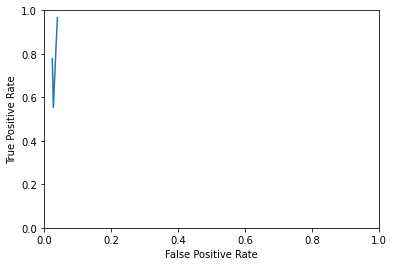

Sensibilidade:  0.7859585517688285
Especificidade:  0.9679320601764494
Precisao:  0.7272799208704254
Medida F1:  0.7468401800270371
Acuracia:  0.9546147978642258
Coeficiente de Matthews 0.7131197999274905
Auc:  0.011361697284111533


In [ ]:
#Total

sensibilidade = (sensibilidadeMaca+sensibilidadeLaranja+sensibilidadeLimao+sensibilidadeManga)/4
especificidade = (especificidadeMaca+especificidadeLaranja+especificidadeLimao+especificidadeManga)/4
precisao = (precisaoMaca+precisaoLaranja+precisaoLimao+precisaoManga)/4
f1 = (f1Maca+f1Laranja+f1Limao+f1Manga)/4
acuracia = (acuraciaMaca+acuraciaLaranja+acuraciaLimao+acuraciaManga)/4
matthews = (matthewsMaca+matthewsLaranja+matthewsLimao+matthewsManga)/4

#pivot = pd.DataFrame(roc, columns = ["x","y"])

#plt.scatter(pivot.y,pivot.x)
x = fpr
y = tpr

plt.plot(x,y)
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 
auc = np.trapz(y,x)

print("Sensibilidade: ",sensibilidade)
print("Especificidade: ",especificidade)
print("Precisao: ",precisao)
print("Medida F1: ",f1)
print("Acuracia: ",acuracia)
print("Coeficiente de Matthews",matthews)
print("Auc: ", auc)

#   Ao analisarmos os dados podemos observar que a máquina possui uma acurácia de 95.4% e esse valor é excelente, porém ao analisarmos a métrica precisão observamos um valor de 72%,
# isso quer dizer que a máquina tá errando em encontrar valores positivos. Então como pode uma máquina acertar em 95% dos casos e "errar" em 28% deles? Ao observarmos a matrix de confusão
# vemos que a acurácia dela é muito alta para mangas e muito baixa para limãos.Isso pode ser explicado caso a máquina tenha sido treinada com valores desbalanceados, o que faz a 
# acurácia varias bastante pra diferentes classes. Além disso, a máquina está sendo submetida a testes onde a maior parte das instancias são da classe com maior acurácia.
#   Para resolver esse problema é preciso balancear os dados, ou retirando dados da classe manga, ou adquirindo mais dados das outras classes.

Questão Extra

P: Quais são os cuidados que um engenheiro de dados deve ter a fim de garantir integridade ética para suas bases de dados que possuem dados humanos?

R: É importante que todo engenheiro de dados tome bastante cuidado quando estiver criando sua base de dados pois é ela que vai refletir diretamente nas atitudes que a máquina irá tomar. Portanto é preciso que os dados incluam e representem todos os tipos e caractéristicas de pessoas, como opiniões diferentes, pesos diferentes, cabelos diferentes, cor de pele diferente, altura diferente, sexualidade diferente, etc. Apenas dessa maneira é possivel criar modelos éticos e representativos.